In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\HP\Desktop\datasets\winequality-red.csv")

In [5]:
df1 = df.copy()
df2= df.copy()

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

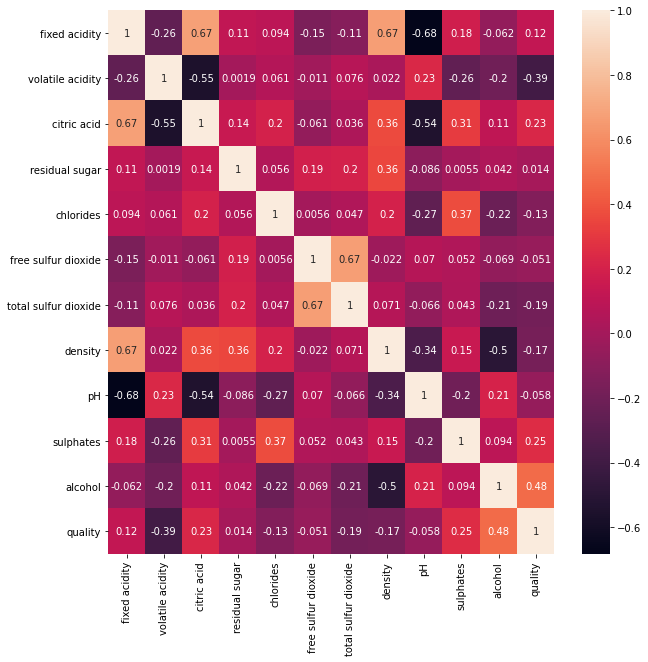

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [9]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df["Quality"] = ["Good" if x>=7 else "Bad" for x in df["quality"]]

In [11]:
quality_range = df[["quality"]]
df.drop(columns = {"quality"}, inplace = True)

In [12]:
target = df[["Quality"]]
df.drop(columns = {"Quality"}, inplace = True)

In [13]:
target.replace({"Good":1, "Bad":0}, inplace = True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#  EDA

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

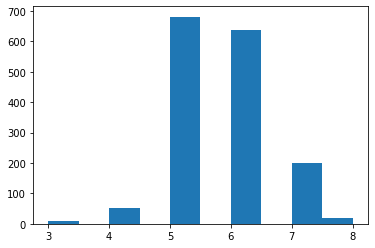

In [14]:
#df1.head()
plt.hist(df1["quality"])

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

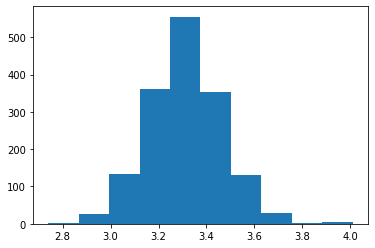

In [15]:
plt.hist(df["pH"])

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

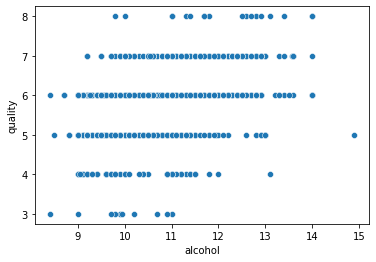

In [16]:
#plt.figure(figsize = (10,10))
sns.scatterplot(x = df["alcohol"],y = df1["quality"])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

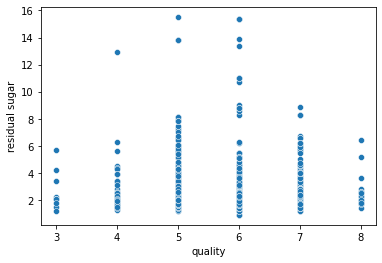

In [17]:
sns.scatterplot(x = df1["quality"], y=df["residual sugar"])

In [49]:
df_alcohol1 = df['alcohol'].copy().astype('int')
for i,x in enumerate(df_alcohol1):
    if x>9 & x<10:
        df_alcohol1[i] = 'low'
    elif x>10 & x<12:
        df_alcohol1[i] = 'medium'
    else:
        df_alcohol1[i] = 'high'

<AxesSubplot:xlabel='quality', ylabel='count'>

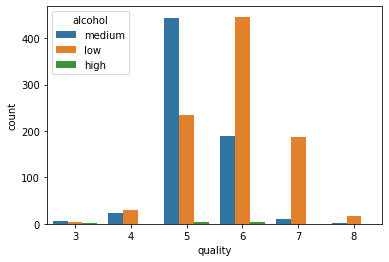

In [52]:
sns.countplot(x = df1['quality'], hue = df_alcohol1) #wine quality based on alcohol content

In [101]:
df_ph = df['pH'].copy()
df_ph.astype('float')

for i,x in enumerate(df['pH']):
    if x>=2.74 and x<3.00:
        df_ph[i] = "ph range 2.74-3"
    elif x>=3.00 and x<3.25:
        df_ph[i] = "ph range 3.00-3.25"
    elif x>=3.25 and x<3.50:
        df_ph[i] = "ph range 3.25-3.50"
    elif x>=3.50 and x<3.75:
        df_ph[i] = "ph range 3.50-3.75"
    else:
        df_ph[i] = "ph range > 3.75"

<AxesSubplot:xlabel='quality', ylabel='count'>

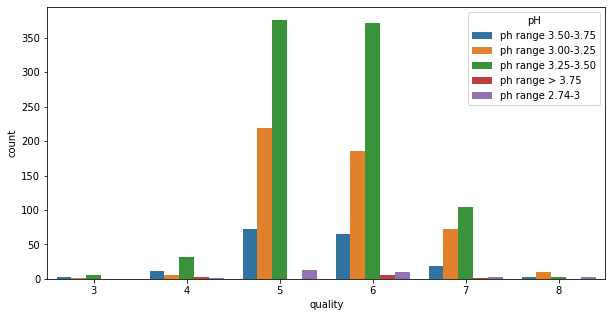

In [106]:
plt.figure(figsize = (10,5))
sns.countplot(x = df1['quality'], hue = df_ph) #wine quality based on PH levels

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [108]:
scaler = StandardScaler()

In [109]:
df = scaler.fit_transform(df)

In [110]:
xtrain, xtest, ytrain, ytest = train_test_split(df, target, test_size = 0.2, random_state = 1)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
model1 = LogisticRegression()
param = {'C':(0.1,0.01)}
grid = GridSearchCV(model1, param, cv = 10 )
grid.fit(xtrain,ytrain.values.ravel())
print("best estimator",grid.best_estimator_)
print("best params",grid.best_params_)


best estimator LogisticRegression(C=0.1)
best params {'C': 0.1}


In [114]:
LR = LogisticRegression(C = 0.01)

In [115]:
LR.fit(xtrain,ytrain.values.ravel())
yhat=LR.predict(xtest)

In [116]:
print(accuracy_score(ytest,yhat))

0.9


## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
RF_model = RandomForestClassifier()

In [119]:
#paramRF = {'max_depth': [2,3,5,10,15,20],
# 'max_features': ['auto', 'sqrt', 'log2'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000],
# 'criterion' :['gini', 'entropy']}

In [122]:
#gridRF = GridSearchCV(RF_model, paramRF, cv = 5)
RF_model.fit(xtrain, ytrain.values.ravel())
#gridRF.best_params_

RandomForestClassifier()

In [123]:
#RF_model1 = RandomForestClassifier()
#RF_model1.fit(xtrain,ytrain.values.ravel())
yhat= RF_model.predict(xtest)
print("Confusion Matrix \n",confusion_matrix(ytest,yhat))
print("Accuracy Score\n", accuracy_score(ytest,yhat))


Confusion Matrix 
 [[278  10]
 [ 17  15]]
Accuracy Score
 0.915625
